In [177]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import requests
import json
import math

os.chdir('/Users/mariomoreno/Desktop/Grad School/Machine Learning/Week 1/311 data')


In [4]:
# QUESTION 1

# Reads in all the datasets into pandas
grf = pd.read_csv('graffiti.csv')
vac = pd.read_csv('vacancies.csv')
lts = pd.read_csv('lights.csv')

#Cleans vacancies dataframe, merges addresses in vacancies
vac.rename(columns={"SERVICE REQUEST TYPE": "Type of Service Request", \
                    "X COORDINATE": "X Coordinate", \
                    "Y COORDINATE": "Y Coordinate", \
                    "ZIP CODE": "ZIP Code", \
                    "SERVICE REQUEST NUMBER": "Service Request Number",\
                    "LATITUDE": "Latitude", "LONGITUDE": "Longitude", \
                    "DATE SERVICE REQUEST WAS RECEIVED": "Creation Date",\
                    }, inplace = True)

vac["Street Address"] = vac[vac.columns[10:14]].apply(lambda x: ' '.join(x.astype(str)), axis = 1)

#Merges all three
condensed = grf.append([vac, lts])

In [5]:
condensed[:10]

,ADDRESS STREET DIRECTION,ADDRESS STREET NAME,ADDRESS STREET NUMBER,ADDRESS STREET SUFFIX,"ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)",Community Area,Completion Date,Creation Date,"IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?",IS BUILDING OPEN OR BOARDED?,...,Service Request Number,Status,Street Address,Type of Service Request,Ward,What Type of Surface is the Graffiti on?,Where is the Graffiti located?,X Coordinate,Y Coordinate,ZIP Code
0,NaN,NaN,NaN,NaN,NaN,4.0,01/04/2017,01/01/2017,NaN,NaN,...,17-00001597,Completed,4921 N DAMEN AVE,Graffiti Removal,40.0,Glass,Front,1.162119e+06,1.932687e+06,60625.0
1,NaN,NaN,NaN,NaN,NaN,31.0,01/03/2017,01/01/2017,NaN,NaN,...,17-00004429,Completed - Dup,2212 S HALSTED ST,Graffiti Removal,25.0,Brick - Unpainted,Side,1.171377e+06,1.889486e+06,60608.0
2,NaN,NaN,NaN,NaN,NaN,23.0,01/03/2017,01/01/2017,NaN,NaN,...,17-00007870,Completed - Dup,3314 W GRAND AVE,Graffiti Removal,26.0,Metal - Painted,Front,1.154038e+06,1.906588e+06,60651.0
3,NaN,NaN,NaN,NaN,NaN,23.0,01/03/2017,01/01/2017,NaN,NaN,...,17-00007927,Completed - Dup,3314 W GRAND AVE,Graffiti Removal,26.0,Brick - Painted,Front,1.154038e+06,1.906588e+06,60651.0
4,NaN,NaN,NaN,NaN,NaN,52.0,01/03/2017,01/01/2017,NaN,NaN,...,17-00009323,Completed - Dup,10359 S AVENUE O,Graffiti Removal,10.0,Vinyl Siding,Side,1.200841e+06,1.836864e+06,60617.0
5,NaN,NaN,NaN,NaN,NaN,4.0,01/03/2017,01/01/2017,NaN,NaN,...,17-00001621,Completed,5207 N DAMEN AVE,Graffiti Removal,40.0,Other/Unknown Surface,Sign,1.162061e+06,1.934610e+06,60625.0
6,NaN,NaN,NaN,NaN,NaN,14.0,01/03/2017,01/01/2017,NaN,NaN,...,17-00001880,Completed,3450 W AINSLIE ST,Graffiti Removal,33.0,Brick - Unpainted,Rear,1.152402e+06,1.932340e+06,60625.0
7,NaN,NaN,NaN,NaN,NaN,23.0,01/03/2017,01/01/2017,NaN,NaN,...,17-00003402,Completed,956 N TRUMBULL AVE,Graffiti Removal,27.0,"Cement (Sidewalk, Alley, Wall, Curb)",Front,1.153201e+06,1.906159e+06,60651.0
8,NaN,NaN,NaN,NaN,NaN,14.0,01/03/2017,01/01/2017,NaN,NaN,...,17-00003570,Completed,4704 N CENTRAL PARK AVE,Graffiti Removal,35.0,Metal - Painted,Sign,1.151539e+06,1.931020e+06,60625.0
9,NaN,NaN,NaN,NaN,NaN,29.0,01/03/2017,01/01/2017,NaN,NaN,...,17-00003714,Completed,1837 S FAIRFIELD AVE,Graffiti Removal,24.0,Aluminum Siding,Garage,1.158324e+06,1.890853e+06,60608.0


In [32]:
# Table: Total counts of services requested
services = condensed.groupby(['Type of Service Request'])
services.size().to_frame()

,0
Type of Service Request,
Alley Light Out,27896
Graffiti Removal,112779
Vacant/Abandoned Building,3666


/Users/mariomoreno/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


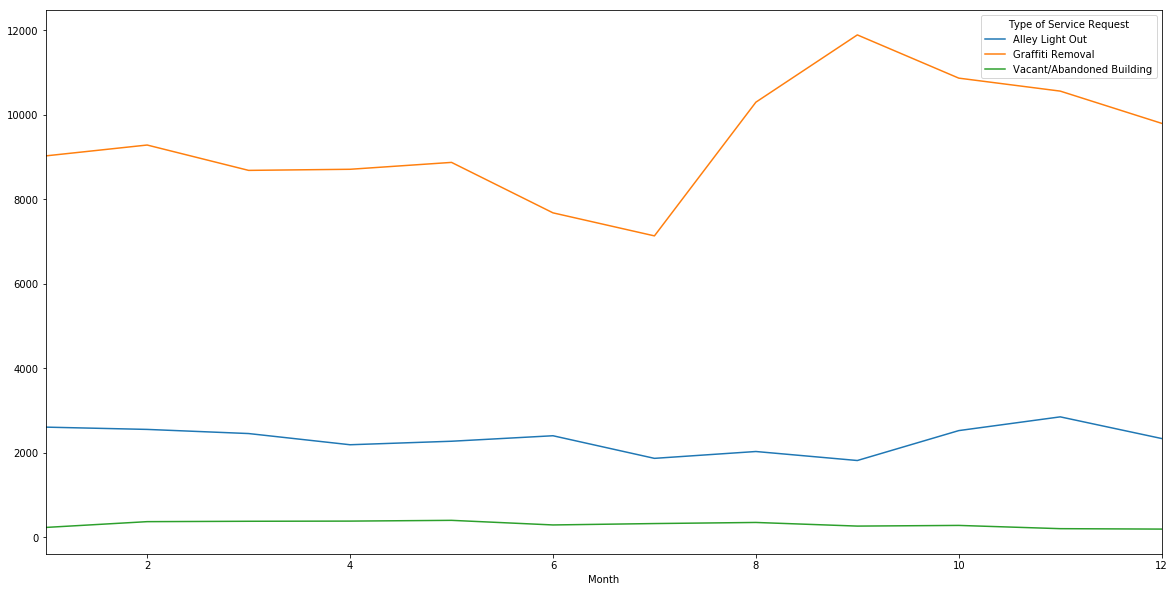

In [429]:
# Graph: Total services requested per month
services_per_month = condensed[['Type of Service Request', 'Creation Date']]
services_per_month['Month'] = pd.DatetimeIndex(services_per_month['Creation Date']).month

spms = services_per_month.groupby(['Month', 'Type of Service Request'])
spms.size().to_frame().reset_index()
to_graph = spms.size().to_frame().reset_index()
graph = to_graph.pivot_table(0, 'Month', 'Type of Service Request')
graph.plot(figsize=(20, 10))
plt.show()

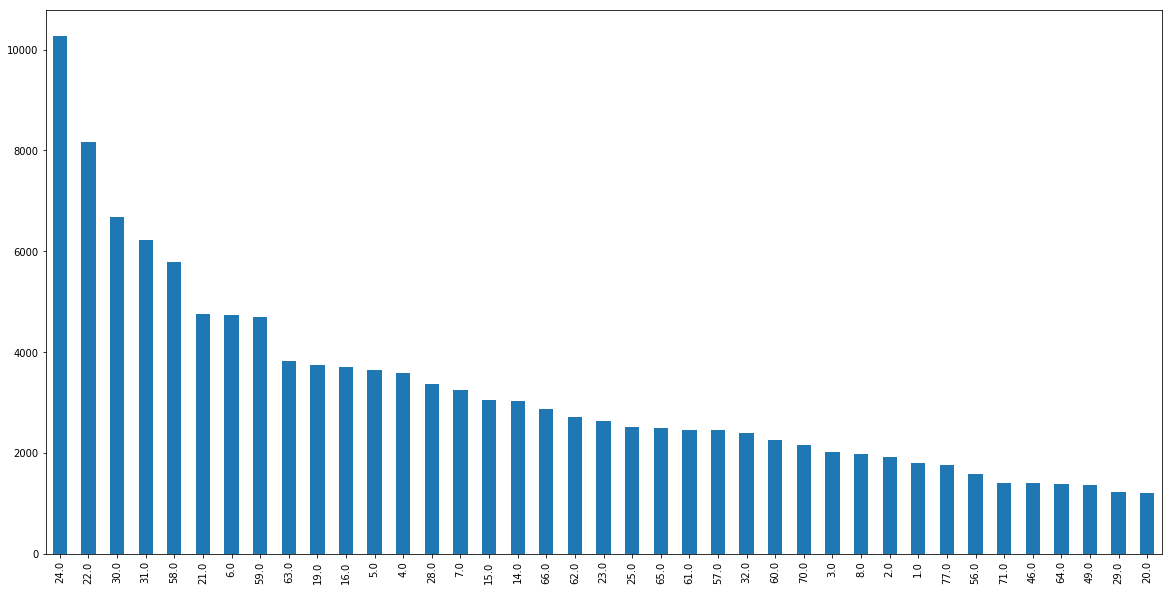

In [425]:
# Graph: Total services requested per community area
condensed['Community Area'].value_counts()[:20].plot(kind='bar', figsize = (20, 10))
plt.show()

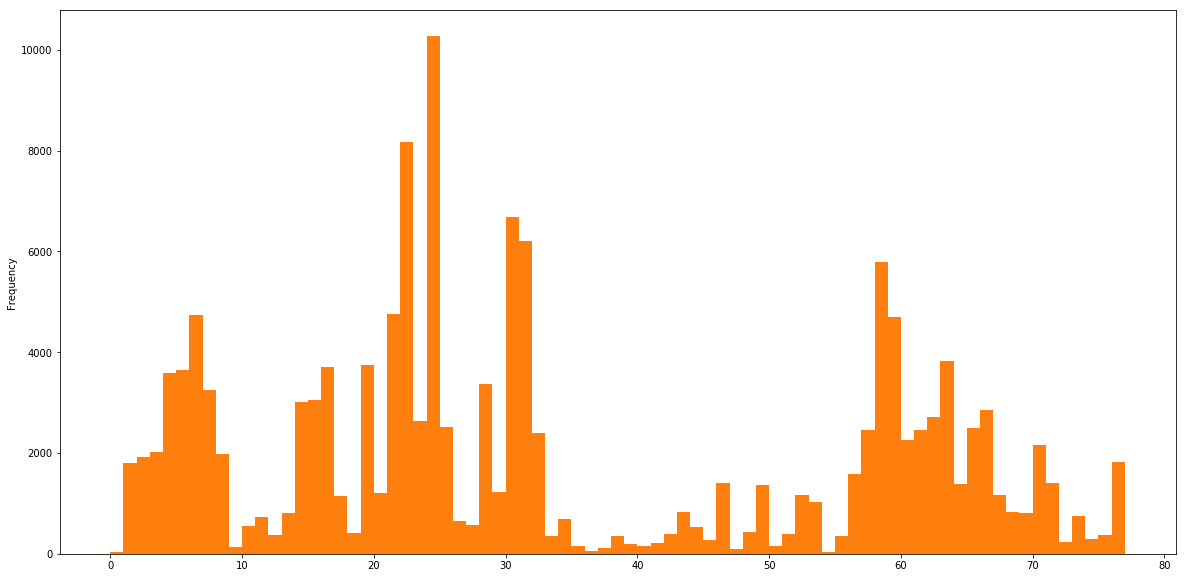

In [424]:
# Graph: frequency of requests per community area
condensed['Community Area'].plot('hist', bins=77, figsize = (20, 10))
plt.show()

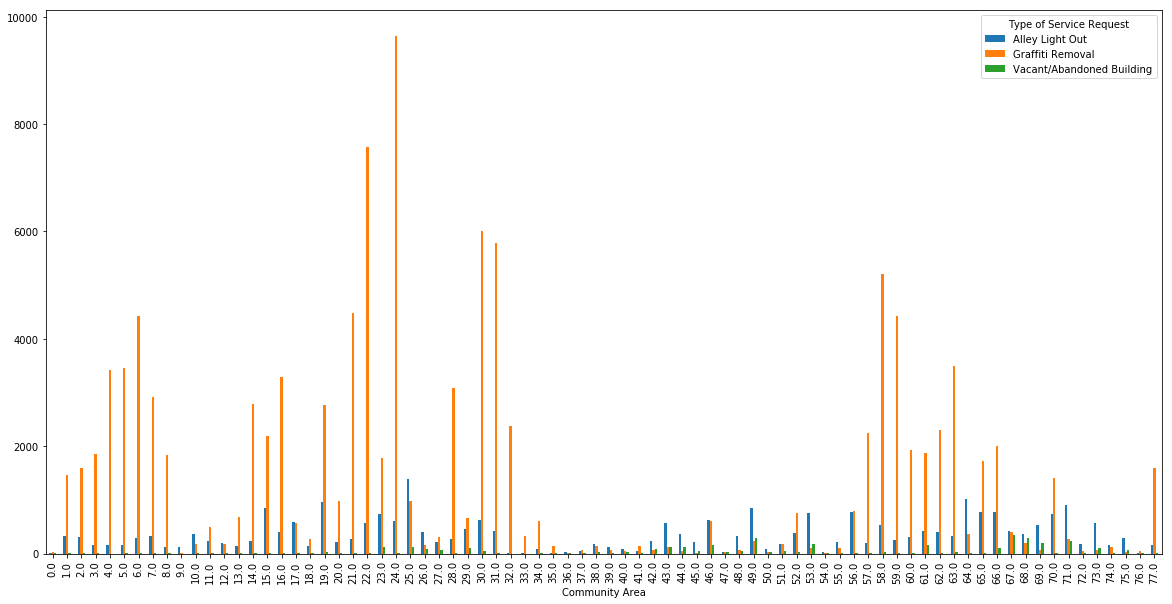

In [419]:
# Graph: Types of request per community area
req_types = condensed.groupby(['Community Area', 'Type of Service Request']).size()
req_frame = req_types.to_frame().reset_index()
req_final = req_frame.pivot_table(0, 'Community Area', 'Type of Service Request')
req_final.plot.bar(figsize=(20,10))
plt.show()

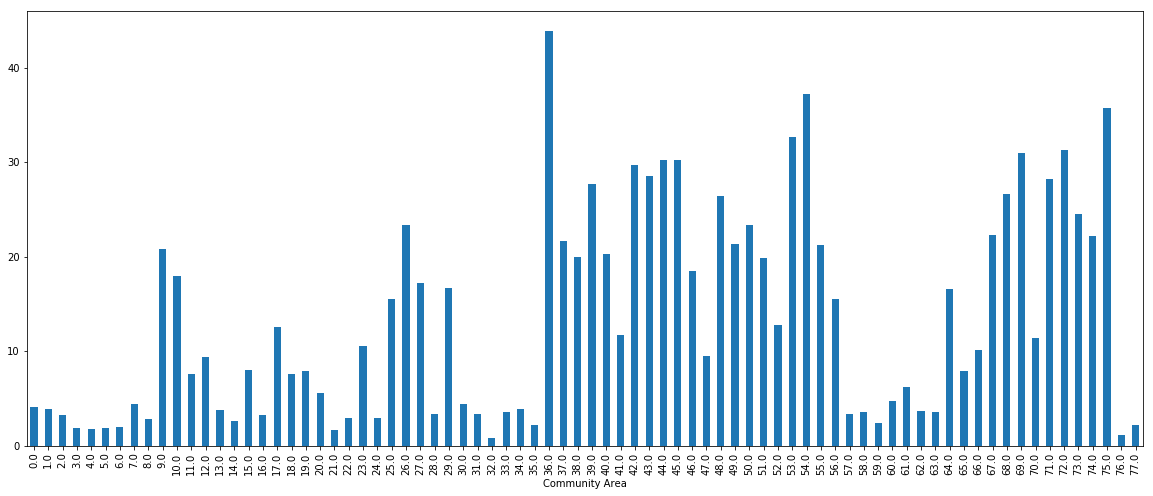

In [422]:
# Graph: Average response time per community area
condensed.reset_index(drop = True, inplace = True)
responses = []

for date in range(len(condensed)):
    created = pd.to_datetime(condensed.loc[date]['Creation Date'])
    completed = pd.to_datetime(condensed.loc[date]['Completion Date'])
    
    difference = completed - created
    responses.append(difference.days)
    
condensed['Response Time'] = responses
response_times = condensed.groupby(['Community Area'])['Response Time'].mean()
response_times.to_frame().reset_index()
response_times.plot.bar(x = 'Community Area', y = 'Response Time', figsize=(20, 8))
plt.show()

In [466]:
print('5 interesting things I learned about Chicago')
print()
print()
print('1:', 'In 2017, the most common 311 call out of Graffiti Removal, Alley Light Out, or Vacant Building calls was \
Graffiti Removal by far. There were 112,779 calls about graffiti made, which is significantly more than the 27,896 calls \
about alley lights and 3,666 about vacant buildings')
print()
print('2:', 'Between July and September, there was marked jump in the number of graffiti calls made. The numbers climbed from \
about 7,000 per month in July, to more than 11,000 per month at its peak in September')
print()
print('3:', 'Community Areas 22 and 24 have the highest frequency of 311 calls placed by a significant margin. These areas \
are Logan Square, with ~8000 calls, and West Town, with more than 10,000 calls.')
print()
print('4:', 'In community areas in the South and Southwest sides, roughly Community Areas 36 - 56, it is more likely \
that an incoming call is about an alley light than about graffiti removal.')
print()
print('5:', 'In communtiy areas in the South and Southwest side, average response times per day is significantly higher \
than response times elsewhere. A vast majority of these areas have wait times of more than 10 days, with some reaching \
more than 30 days.')

5 interesting things I learned about Chicago


1: In 2017, the most common 311 call out of Graffiti Removal, Alley Light Out, or Vacant Building calls was Graffiti Removal by far. There were 112,779 calls about graffiti made, which is significantly more than the 27,896 calls about alley lights and 3,666 about vacant buildings

2: Between July and September, there was marked jump in the number of graffiti calls made. The numbers climbed from about 7,000 per month in July, to more than 11,000 per month at its peak in September

3: Community Areas 22 and 24 have the highest frequency of 311 calls placed by a significant margin. These areas are Logan Square, with ~8000 calls, and West Town, with more than 10,000 calls.

4: In community areas in the South and Southwest sides, roughly Community Areas 36 - 56, it is more likely that an incoming call is about an alley light than about graffiti removal.

5: In communtiy areas in the South and Southwest side, average response times per day is si

In [258]:
# QUESTION 2

# get ACS data
# want to get total population for a given block, african-american population, median household income, and citizenship status
# ultimate goal is to produce:
## african-american percentage of population per block
## percent of households under $20,000 per block
## percent of single moms per block

# use only last three months of vacant and alley lights data
cut_condensed = condensed.loc[condensed['Type of Service Request'] != 'Graffiti Removal']
cut_condensed['Month'] = pd.DatetimeIndex(cut_condensed['Creation Date']).month
date_condensed = cut_condensed.loc[cut_condensed['Month'] >= 10]
date_condensed['Latitude'].fillna(0, inplace=True)
date_condensed['Longitude'].fillna(0, inplace=True)
date_condensed.reset_index(drop = True, inplace = True)

race = []
income = []
single_mom = []

total_key = 'B01003_001E'
race_key = 'B02001_003E'
income_key = 'B19001_004E'
smom_key = 'B11001_006E'

for row in range(len(date_condensed)):

    # get latitude and longitude
    lat = date_condensed.loc[row]['Latitude']
    lon = date_condensed.loc[row]['Longitude']
    
    if lat == 0:
        race.append("No Value")
        income.append("No Value")
        single_mom.append("No Value")
        continue
        
    if lon == 0:
        race.append("No Value")
        income.append("No Value")
        single_mom.append("No Value")
        continue
    
    # make call to geocode census api using lat and lon
    url_str = 'https://geo.fcc.gov/api/census/block/find?latitude={}&longitude={}&format=json'.format(lat, lon)
    response = requests.get(url_str).json()
    
    # pull out census and block data
    fips = response['Block']['FIPS']
    county = fips[2:5]
    tract = fips[5:11]
    block = fips[11]
    
    # create acs call using block and tract information
    acs_url = 'https://api.census.gov/data/2016/acs/acs5?get=NAME,{},{},{},{}&for=block%20group:{}&in=state:17%20county:{}%20tract:{}&key=057067ab3c89ff8d3a7a8dc08534ca151bb76bb2'.format(total_key, race_key, income_key, smom_key, block, county, tract)
    
    # move new data into existing dataframe
    acs_data = requests.get(acs_url).json()
    
    if int(acs_data[1][1]) == 0:
        race.append(0)
        income.append(0)
        single_mom.append(0)
    
    else:
        race.append(int(acs_data[1][2]) / int(acs_data[1][1]))
        income.append(int(acs_data[1][3]) / int(acs_data[1][1]))
   
        if acs_data[1][4] == None:
            acs_data[1].insert(4, 0)
    
        single_mom.append(int(acs_data[1][4]) / int(acs_data[1][1]))
        
race_col = pd.Series(race)
income_col = pd.Series(income)
smom_col = pd.Series(single_mom)
    
date_condensed['AfAm Percentage'] = race_col.values
date_condensed['<20k Percentage'] = income_col.values
date_condensed['Single Mom Percentage'] = smom_col.values
    

/Users/mariomoreno/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/mariomoreno/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/mariomoreno/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

In [259]:
date_condensed[:10]

,ADDRESS STREET DIRECTION,ADDRESS STREET NAME,ADDRESS STREET NUMBER,ADDRESS STREET SUFFIX,"ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)",Community Area,Completion Date,Creation Date,"IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?",IS BUILDING OPEN OR BOARDED?,...,What Type of Surface is the Graffiti on?,Where is the Graffiti located?,X Coordinate,Y Coordinate,ZIP Code,Response Time,Month,AfAm Percentage,<20k Percentage,Single Mom Percentage
0,W,VAN BUREN,4236.0,ST,True,26.0,NaN,10/01/2017,BACK DOOR,Open,...,NaN,NaN,1.148216e+06,1.897686e+06,60624.0,NaN,10,0.895041,0.0206612,0.119008
1,S,GILBERT,8424.0,CT,False,71.0,NaN,10/01/2017,FRONT AND REAR,Open,...,NaN,NaN,1.172799e+06,1.848667e+06,60620.0,NaN,10,0.973808,0.0174614,0.139019
2,W,GARFIELD,956.0,BLVD,False,61.0,NaN,10/02/2017,NaN,Open,...,NaN,NaN,1.170864e+06,1.868360e+06,60609.0,NaN,10,0.9125,0.0197917,0.116667
3,S,ADA,7737.0,ST,False,71.0,NaN,10/02/2017,NaN,Open,...,NaN,NaN,1.168784e+06,1.853458e+06,60620.0,NaN,10,0.890686,0.0485123,0.147477
4,S,MAY,10213.0,ST,True,73.0,NaN,10/02/2017,GARAGE,Open,...,NaN,NaN,1.170457e+06,1.837076e+06,60643.0,NaN,10,0.975763,0.016158,0.185817
5,W,GARFIELD,2045.0,BLVD,False,67.0,NaN,10/02/2017,NaN,Open,...,NaN,NaN,1.163582e+06,1.868041e+06,60636.0,NaN,10,0.789167,0.025,0.124167
6,S,MAY,4858.0,ST,True,61.0,NaN,10/02/2017,COACH HOUSE,Open,...,NaN,NaN,1.169472e+06,1.872588e+06,60609.0,NaN,10,0.553097,0.0663717,0.127212
7,W,116TH,1017.0,ST,True,53.0,NaN,10/02/2017,REAR AND SIDES OPEN,Open,...,NaN,NaN,1.171557e+06,1.827892e+06,60643.0,NaN,10,0.907051,0.0304487,0.0945513
8,W,69TH,1021.0,ST,True,68.0,NaN,10/02/2017,REAR DOOR AND WINDOWS,Open,...,NaN,NaN,1.170611e+06,1.859065e+06,60621.0,NaN,10,0.971861,0,0.138528
9,S,LOOMIS,6448.0,BLVD,True,67.0,NaN,10/02/2017,FRONT DOOR OPEN ROOF IS DAMAGES,Open,...,NaN,NaN,1.168103e+06,1.861992e+06,60636.0,NaN,10,0.996085,0.0211433,0.0869225


In [350]:
# QUESTION 2 PART A 

# Which blocks get Vacant and Abandoned Building Requests? 

# calculate mean demographics for all community areas
vacant = date_condensed.loc[date_condensed['Type of Service Request'] == 'Vacant/Abandoned Building']
ov_mean_afam = vacant['AfAm Percentage'].mean()
ov_mean_20k = vacant['<20k Percentage'].mean()
ov_mean_smom = vacant['Single Mom Percentage'].mean()
 
# find out which community areas get most vacant bldg calls by selecting
# those that received more than 20 in the last 3 months.
top_vacant_calls = []
vacant_occ = vacant.groupby(['Community Area', 'Type of Service Request']).size()

for i, j in vacant_occ.items():
    if j > 20:
        top_vacant_calls.append(i[0])

# from those top vacant call areas, calculate mean demographics
afams = []
incomes = []
smoms = []

for ca in top_vacant_calls:
    row = vacant.loc[vacant['Community Area'] == ca]
    
    afams.append(row['AfAm Percentage'].mean())
    incomes.append(row['<20k Percentage'].mean())
    smoms.append(row['Single Mom Percentage'].mean())
            
# compare mean demographics of community areas with most calls to overall means

comparison = {'High Number of Vacant Calls': [np.mean(afams), np.mean(incomes), np.mean(smoms)], 'Overall': \
             [ov_mean_afam, ov_mean_20k, ov_mean_smom]}

comparison_df = pd.DataFrame(data = comparison, index = ['Afam', '<20k', 'smom'])

print(comparison_df)
print()
print('Per the table above, the primary difference between community areas that place a high number of requests, ie more than 20 calls, \
about vacant and abandoned buildings compared to the overall number of calls is that they tend to have a higher \
percentage of African American populations (89 percent to 79 percent). While community areas that place a high number of requests also have \
a higher percentage of single mothers and households under 20,000 USD per year than the overall percentage, those differences \
are almost negligible.')

      High Number of Vacant Calls   Overall
Afam                     0.890770  0.791071
<20k                     0.032722  0.030717
smom                     0.119391  0.111243

Per the table above, the primary difference between community areas that place a high number of requests, ie more than 20 calls, about vacant and abandoned buildings compared to the overall number of calls is that they tend to have a higher percentage of African American populations (89 percent to 79 percent). While community areas that place a high number of requests also have a higher percentage of single mothers and households under 20,000 USD per year than the overall percentage, those differences are almost negligible.


In [349]:
# QUESTION 2 PART B

# calculate mean demographics for all community areas
alley_lights = date_condensed.loc[date_condensed['Type of Service Request'] == 'Alley Light Out']
alley_lights['AfAm Percentage'].replace(to_replace="No Value", value=0, inplace=True)
alley_lights['<20k Percentage'].replace(to_replace="No Value", value=0, inplace=True)
alley_lights['Single Mom Percentage'].replace(to_replace="No Value", value=0, inplace=True)

ov_mean_afam_lts = alley_lights['AfAm Percentage'].mean()
ov_mean_20k_lts = alley_lights['<20k Percentage'].mean()
ov_mean_smom_lts = alley_lights['Single Mom Percentage'].mean()
 
# find out which community areas get most alley lights calls by selecting
# those that received more than 200 in the last 3 months.
top_alley_calls = []
alley_occ = alley_lights.groupby(['Community Area', 'Type of Service Request']).size()

for i, j in alley_occ.items():
    if j > 200:
        top_alley_calls.append(i[0])

# from those top alley call areas, calculate mean demographics
afams_all = []
incomes_all = []
smoms_all = []

for ca in top_alley_calls:
    row = alley_lights.loc[alley_lights['Community Area'] == ca]
    
    afams_all.append(row['AfAm Percentage'].mean())
    incomes_all.append(row['<20k Percentage'].mean())
    smoms_all.append(row['Single Mom Percentage'].mean())
            
# compare mean demographics of community areas with most calls to overall means

comparison = {'High Number of Alley Calls': [np.mean(afams_all), np.mean(incomes_all), np.mean(smoms_all)], 'Overall': \
             [ov_mean_afam_lts, ov_mean_20k_lts, ov_mean_smom_lts]}

comparison_df_all = pd.DataFrame(data = comparison, index = ['Afam', '<20k', 'smom'])

print(comparison_df_all)
print()
print('Per the table above, the primary difference between community areas that place a high number of requests, ie more than 200 calls, \
about alley lights compared to the overall number of calls is that they tend to have a higher percentage of single mom \
households (7.7 percent to 7.3 percent) and a lower percentage of households with income less than 20,000 USD per year \
(2 percent to 2.2 percent). While community areas that place a high number of requests also have a higher percentage \
of African American population than the overall percentage, those differences are almost negligible.')

/Users/mariomoreno/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


      High Number of Alley Calls   Overall
Afam                    0.396019  0.391548
<20k                    0.019926  0.022068
smom                    0.077434  0.073108

Per the table above, the primary difference between community areas that place a high number of requests, ie more than 200 calls, about alley lights compared to the overall number of calls is that they tend to have a higher percentage of single mom households (7.7 percent to 7.3 percent) and a lower percentage of households with income less than 20,000 USD per year (2 percent to 2.2 percent). While community areas that place a high number of requests also have a higher percentage of African American population than the overall percentage, those differences are almost negligible.


In [467]:
# QUESTION 2 PART C

# Does the type of block calling for abandoned buildings or for alley lights 
# change over time?
calls_per_month = date_condensed[['Type of Service Request', 'Creation Date', 'AfAm Percentage', '<20k Percentage', 'Single Mom Percentage']]
calls_per_month['Month'] = pd.DatetimeIndex(calls_per_month['Creation Date']).month

calls_per_month['AfAm Percentage'].replace(to_replace="No Value", value=0, inplace=True)
calls_per_month['<20k Percentage'].replace(to_replace="No Value", value=0, inplace=True)
calls_per_month['Single Mom Percentage'].replace(to_replace="No Value", value=0, inplace=True)

# for each of the months we have in this dataframe, find the mean of the demographics of the population making requests

months = [10, 11, 12]
afam_month = []
income_month = []
smom_month = []

for month in months:
    month_df = calls_per_month.loc[calls_per_month['Month'] == month]
    afam_month.append(month_df['AfAm Percentage'].mean())
    income_month.append(month_df['<20k Percentage'].mean())
    smom_month.append(month_df['Single Mom Percentage'].mean())

months_data = {'December': [afam_month[2], income_month[2], smom_month[2]], 'November': \
             [afam_month[1], income_month[1], smom_month[1]], 'October': [afam_month[0], income_month[0], smom_month[0]]}

months_df_all = pd.DataFrame(data = months_data, index = ['Afam', '<20k', 'smom'])
print(months_df_all)
print()
print('Per the table, from October to December there is a general decline. Blocks with greater African American percentage \
of the population make less calls in December than in November, than in October. The trend is otherwise consistent across \
the other variables.')


/Users/mariomoreno/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mariomoreno/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


      December  November   October
Afam  0.403049  0.424870  0.441223
<20k  0.023190  0.022637  0.022521
smom  0.074095  0.076606  0.077605

Per the table, from October to December there is a general decline. Blocks with greater African American percentage of the population make less calls in December than in November, than in October. The trend is otherwise consistent across the other variables.


In [440]:
# QUESTION 2 PART D

# Difference in blocks that make Vacant and Abandoned Building calls and those that make Alley calls

print('Vacant calls')
print(comparison_df)
print()
print('Alley calls')
print(comparison_df_all)
print()
print('A block that makes vacant building calls is significantly more likely to be African American, while \
one that makes alley calls is more likely to have single mom households')

Vacant calls
      High Number of Vacant Calls   Overall
Afam                     0.890770  0.791071
<20k                     0.032722  0.030717
smom                     0.119391  0.111243

Alley calls
      High Number of Alley Calls   Overall
Afam                    0.396019  0.391548
<20k                    0.019926  0.022068
smom                    0.077434  0.073108

A block that makes vacant building calls is significantly more likely to be African American, while one that makes alley calls is more likely to have single mom households


In [220]:
# QUESTION 3 PART A

# Find Ward for 3600 W Roosevelt Ave: https://www.cityofchicago.org/city/en/depts/mayor/iframe/lookup_ward_and_alderman.html
# Ward 24

ward_condensed = condensed.loc[condensed['Ward'] == 24]
ward_types = ward_condensed.groupby(['Ward', 'Type of Service Request']).size()

for i, j in ward_types.items():
    if i[1] == "Alley Light Out":
        alley_pct = j / len(ward_condensed)
    elif i[1] == "Graffiti Removal":
        graf_pct = j / len(ward_condensed)
    else:
        build_pct = j / len(ward_condensed)

print('Probability of Calls for 3600 W. Roosevelt Avenue')
print()
print('Probability of Alley Light Call:', alley_pct)
print('Probability of Graffiti Call:', graf_pct)
print('Probability of Vacant Building Call:', build_pct)
print()
print('Of the three types of requests, a graffiti removal call is the most \
likely call to come from 3600 W. Roosevelt Avenue. From that location, it \ 
has a probability of 66%.')

Probability of Calls for 3600 W. Roosevelt Avenue

Probability of Alley Light Call: 0.273917421954
Probability of Graffiti Call: 0.659113796576
Probability of Vacant Building Call: 0.0669687814703

Of the three types of requests, a graffiti removal call is the most likely call to come from 3600 W. Roosevelt Avenue. From that location, it has a probability of 66%.


In [255]:
# QUESTION 3 PART B

# Find Community Area for Uptown and Garfield Park
# Uptown = Community Area # 3
# Garfield Park = Community Areas 26, 27

commarea = condensed[(condensed['Community Area'] == 3) | (condensed['Community Area']==26) | (condensed['Community Area']==27)]

commarea_types = commarea.groupby(['Community Area', 'Type of Service Request']).size()

garfield_total = 0

for i, j in commarea_types.items():
    if i[0] == 3.0 and i[1] == 'Graffiti Removal':
        uptown_pct = j / len(condensed)
    elif i[0] == 26.0 and i[1] == 'Graffiti Removal':
        garfield_total += j
    elif i[0] == 27.0 and i[1] == 'Graffiti Removal':
        garfield_total += j
    
garfield_pct = garfield_total / len(condensed)

print('Percentage of all Graffiti Removal calls originating from Uptown or Garfield')
print()
print('Percent of all graffiti calls from Uptown:', uptown_pct)
print('Percent of all graffiti calls from Garfield', garfield_pct)
print()
print('As evidenced by the table above, for any given graffiti call, it is about \
4x more likely that said call originated from Uptown than from Garfield')

Percentage of all Graffiti Removal calls originating from Uptown or Garfield

Percent of all graffiti calls from Uptown: 0.0128376552747
Percent of all graffiti calls from Garfield 0.00315225750133

As evidenced by the table above, for any given graffiti call, it is about 4x more likely that said call originated from Uptown than from Garfield


In [257]:
# QUESTION 3 PART C

total_calls = 1000
garfield = 600
uptown = 400
uptown_grf = 160
garfield_grf = 100

total_graffiti_calls = uptown_grf + garfield_grf
prob_uptown = uptown_grf / total_graffiti_calls
prob_garfield = garfield_grf / total_graffiti_calls

print('Probability of graffiti calls from Garfield and Uptown')
print()
print('Probability Uptown:', prob_uptown)
print('Probability Garfield:', prob_garfield)
print()
print('It is 1.6x more likely that an incoming graffiti removal call is from Uptown')

Probability of graffiti calls from Garfield and Uptown

Probability Uptown: 0.6153846153846154
Probability Garfield: 0.38461538461538464

It is 1.6x more likely that an incoming graffiti removal call is from Uptown
